## Model Training

#### 1.1 Import Data and Required Packages
##### Importing Pandas, Numpy, Matplotlib, Seaborn and Warings Library.

In [92]:
# Basic Import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
# Modelling
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import warnings

#### Import the CSV Data as Pandas DataFrame

In [93]:
df = pd.read_csv('./dataset/students.csv')

#### Show Top 5 Records

In [94]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [95]:
df["avg"] = (df['math_score'] + df['reading_score'] + df['writing_score']) / 3

#### Preparing X and Y variables

In [96]:
X = df.drop(columns=['math_score','reading_score','writing_score'],axis=1)

In [97]:
X.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,avg
0,female,group B,bachelor's degree,standard,none,72.666667
1,female,group C,some college,standard,completed,82.333333
2,female,group B,master's degree,standard,none,92.666667
3,male,group A,associate's degree,free/reduced,none,49.333333
4,male,group C,some college,standard,none,76.333333


In [98]:
print("Categories in 'gender' variable:     ",end=" " )
print(df['gender'].unique())

print("Categories in 'race_ethnicity' variable:  ",end=" ")
print(df['race_ethnicity'].unique())

print("Categories in'parental level of education' variable:",end=" " )
print(df['parental_level_of_education'].unique())

print("Categories in 'lunch' variable:     ",end=" " )
print(df['lunch'].unique())

print("Categories in 'test preparation course' variable:     ",end=" " )
print(df['test_preparation_course'].unique())

Categories in 'gender' variable:      ['female' 'male']
Categories in 'race_ethnicity' variable:   ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in'parental level of education' variable: ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in 'lunch' variable:      ['standard' 'free/reduced']
Categories in 'test preparation course' variable:      ['none' 'completed']


In [100]:
y = df['avg']

In [101]:
y

0      72.666667
1      82.333333
2      92.666667
3      49.333333
4      76.333333
         ...    
995    94.000000
996    57.333333
997    65.000000
998    74.333333
999    83.000000
Name: avg, Length: 1000, dtype: float64

In [102]:
# Create Column Transformer with 3 types of transformers
num_features = X.select_dtypes(exclude="object").columns
cat_features = X.select_dtypes(include="object").columns

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder", oh_transformer, cat_features),
        ("StandardScaler", numeric_transformer, num_features),        
    ]
)

In [103]:
X = preprocessor.fit_transform(X)

In [104]:
pd.DataFrame(X)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.343574
1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.021927
2,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.747064
3,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,-1.293830
4,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.600881
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.840630
996,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,-0.732434
997,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,-0.194430
998,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.460532


In [105]:
X.shape

(1000, 18)

In [106]:
# separate dataset into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
X_train.shape, X_test.shape

((800, 18), (200, 18))

#### Create an Evaluate Function to give all metrics after model Training

In [107]:
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, mse,rmse, r2_square

In [108]:
from sklearn import tree
from zmq import device


models = {
    "Linear Regression": LinearRegression(n_jobs=-1),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(n_jobs=-1),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(n_jobs=-1),
    "XGBRegressor": XGBRegressor(tree_method="hist",device='cuda'), 
    "CatBoosting Regressor": CatBoostRegressor(verbose=False,task_type="GPU"),
    "AdaBoost Regressor": AdaBoostRegressor()
}
model_list = []
r2_list =[]

In [109]:
# My DataFrame Implementation for better comparision
performance_df_train = pd.DataFrame(columns=['Name','MAE','MSE','RMSE','R2_SQUARE'])
performance_df_test = pd.DataFrame(columns=['Name','MAE','MSE','RMSE','R2_SQUARE'])
index = 0
for name, model in models.items():
    model.fit(X_train,y_train)
    
    train_pred = model.predict(X_train)
    test_pred = model.predict(X_test)
    
    train_mae, train_mse, train_rmse, train_r2 = evaluate_model(y_train,train_pred)
    test_mae, test_mse, test_rmse, test_r2 = evaluate_model(y_test,test_pred)
    
    performance_df_train.loc[len(performance_df_train)] = [name, train_mae, train_mse, train_rmse, train_r2]
    performance_df_test.loc[len(performance_df_test)] = [name, test_mae, test_mse, test_rmse, test_r2]
    


In [110]:
performance_df_train

,Name,MAE,MSE,RMSE,R2_SQUARE
0,Linear Regression,9.934276e-15,1.615114e-28,1.270871e-14,1.000000
1,Lasso,8.075025e-01,1.018143e+00,1.009031e+00,0.994895
2,Ridge,1.690525e-02,4.305993e-04,2.075089e-02,0.999998
3,K-Neighbors Regressor,3.109667e+00,1.669850e+01,4.086380e+00,0.916277
4,Decision Tree,7.016610e-16,7.636174e-30,2.763363e-15,1.000000
5,Random Forest Regressor,2.152917e-02,1.440862e-02,1.200359e-01,0.999928
6,XGBRegressor,9.424957e-03,2.172557e-04,1.473960e-02,0.999999
7,CatBoosting Regressor,2.615033e-01,2.603470e-01,5.102421e-01,0.998695
8,AdaBoost Regressor,7.280491e-01,9.145899e-01,9.563419e-01,0.995414


In [111]:
performance_df_test.sort_values(by='R2_SQUARE',ascending=False)

,Name,MAE,MSE,RMSE,R2_SQUARE
0,Linear Regression,9.716672e-15,1.484952e-28,1.218586e-14,1.000000
2,Ridge,1.785365e-02,5.201007e-04,2.280572e-02,0.999998
6,XGBRegressor,1.115008e-01,4.914631e-01,7.010443e-01,0.997707
4,Decision Tree,1.033333e-01,5.111111e-01,7.149204e-01,0.997616
5,Random Forest Regressor,1.100667e-01,8.519460e-01,9.230092e-01,0.996026
1,Lasso,8.311744e-01,1.114558e+00,1.055726e+00,0.994801
8,AdaBoost Regressor,7.139602e-01,1.515563e+00,1.231082e+00,0.992930
7,CatBoosting Regressor,4.365873e-01,2.519686e+00,1.587352e+00,0.988246
3,K-Neighbors Regressor,3.708333e+00,2.587727e+01,5.086970e+00,0.879285


In [114]:
for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Evaluate Train and Test dataset
    model_train_mae , _ , model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)

    model_test_mae , _ , model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)

    
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('----------------------------------')
    
    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)
    
    print('='*35)
    print('\n')

Linear Regression
Model performance for Training set
- Root Mean Squared Error: 0.0000
- Mean Absolute Error: 0.0000
- R2 Score: 1.0000
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 0.0000
- Mean Absolute Error: 0.0000
- R2 Score: 1.0000


Lasso
Model performance for Training set
- Root Mean Squared Error: 1.0090
- Mean Absolute Error: 0.8075
- R2 Score: 0.9949
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 1.0557
- Mean Absolute Error: 0.8312
- R2 Score: 0.9948


Ridge
Model performance for Training set
- Root Mean Squared Error: 0.0208
- Mean Absolute Error: 0.0169
- R2 Score: 1.0000
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 0.0228
- Mean Absolute Error: 0.0179
- R2 Score: 1.0000


K-Neighbors Regressor
Model performance for Training set
- Root Mean Squared Error: 4.0864
- Mean Absolute Error: 3.1097
- R2 Score: 0.9163
-----------------------

### Results

In [115]:
pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model Name', 'R2_Score']).sort_values(by=["R2_Score"],ascending=False)

,Model Name,R2_Score
0,Linear Regression,1.000000
2,Ridge,0.999998
6,XGBRegressor,0.997707
4,Decision Tree,0.997616
5,Random Forest Regressor,0.995866
1,Lasso,0.994801
8,AdaBoost Regressor,0.993317
7,CatBoosting Regressor,0.988246
3,K-Neighbors Regressor,0.879285


## Linear Regression

In [116]:
lin_model = LinearRegression(fit_intercept=True)
lin_model = lin_model.fit(X_train, y_train)
y_pred = lin_model.predict(X_test)
score = r2_score(y_test, y_pred)*100
print(" Accuracy of the model is %.2f" %score)

 Accuracy of the model is 100.00


## Plot y_pred and y_test

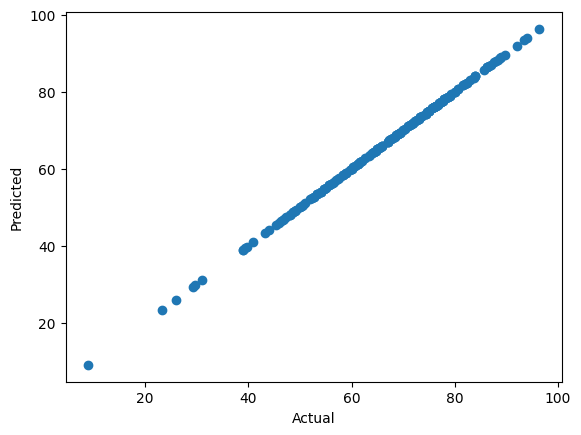

In [117]:
plt.scatter(y_test,y_pred);
plt.xlabel('Actual');
plt.ylabel('Predicted');

<Axes: xlabel='avg'>

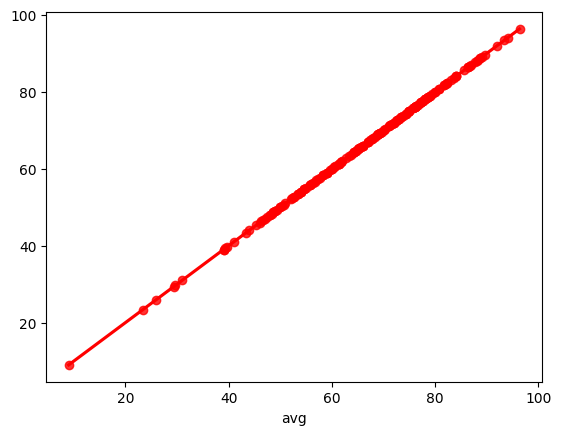

In [118]:
sns.regplot(x=y_test,y=y_pred,ci=None,color ='red')

#### Difference between Actual and Predicted Values

In [119]:
pred_df=pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred,'Difference':y_test-y_pred})
pred_df

,Actual Value,Predicted Value,Difference
521,87.000000,87.000000,1.421085e-14
737,64.000000,64.000000,0.000000e+00
740,75.000000,75.000000,1.421085e-14
660,74.666667,74.666667,1.421085e-14
411,81.666667,81.666667,1.421085e-14
...,...,...,...
408,55.000000,55.000000,0.000000e+00
332,57.000000,57.000000,0.000000e+00
208,77.000000,77.000000,0.000000e+00
613,72.000000,72.000000,0.000000e+00


In [122]:
lin_model.coef_

array([ 0.13558149,  0.13558149,  0.65515991,  0.65515991,  0.65515991,
        0.65515991,  0.65515991,  0.34494798,  0.34494798,  0.34494798,
        0.34494798,  0.34494798,  0.34494798,  0.38882146,  0.38882146,
        8.18534902,  8.18534902, 14.25019554])